# TSF Task 2: Prediction using Unupervised ML
### **K- Means Clustering**
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset: https://bit.ly/3kXTdox

### Author: Sourav Kumar

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set()

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To center the matplotlib figures
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# Importing the csv file
data = pd.read_csv("Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Dropping Id 
data.drop(['Id'], axis=1, inplace = True)

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No null values and also all values are numeric except the target

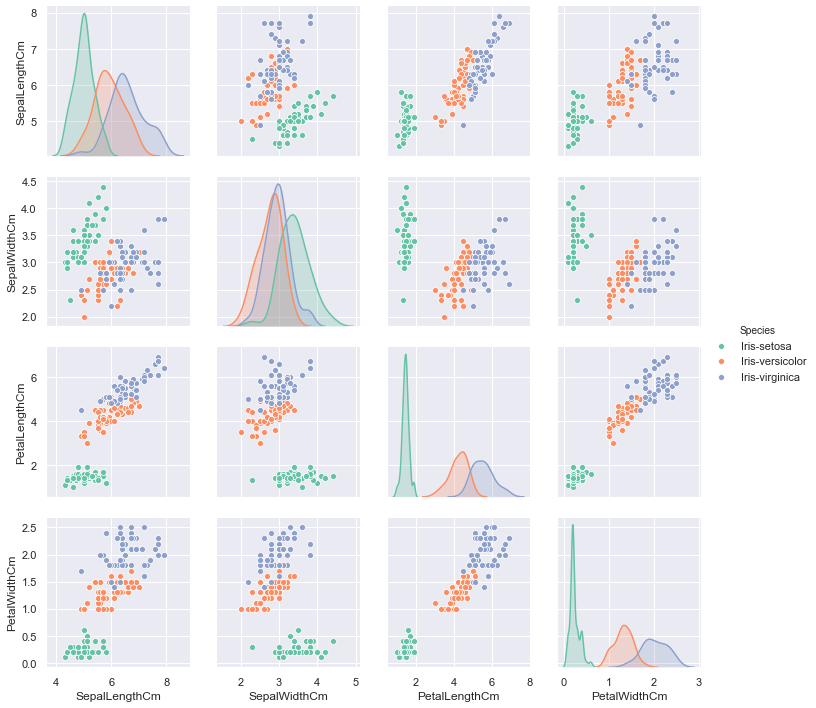

In [8]:
sns.pairplot(data, hue="Species", palette="Set2")
plt.show()

It is very clear that iris-setosa is easily separable from the other species. But the task here is to find the unknown labels and visualize them.

In [9]:
features = data.iloc[:, :-1]

## Implementing K- Means Clustering

In [10]:
# Importing
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99) 

**Why n_clusters=99 ?** Simple, because we don't know the optimal number of clusters. So, trying our luck wuth 99 clusters.

In [11]:
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=99, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
identified_clusters = kmeans.fit_predict(features)
identified_clusters

array([ 6, 92, 72, 48, 58, 90, 72, 87, 13,  1, 64, 38, 92, 75, 62, 63, 69,
       58, 32, 43, 85, 43, 20, 97, 88,  1, 97,  6,  6, 48,  1, 85, 76,  8,
        1, 49, 78,  1, 13, 87, 58, 35, 72, 22, 26, 92, 43, 72, 64, 87, 60,
       93, 94, 70, 74, 96, 33,  7, 74, 18, 46, 50, 45, 11, 39, 40, 27, 14,
       95, 23, 24, 71, 59, 89, 67, 40, 82, 61, 11, 57, 23, 23, 14,  5, 27,
       73,  4, 16, 51, 70, 86, 11, 14,  7,  0, 51, 51, 67, 66,  0, 25, 19,
       55,  2, 80,  3, 21, 17, 41, 29, 42, 77, 44, 98, 47, 65,  2, 54, 37,
       52,  9, 81,  3, 79, 83, 68, 79, 24, 15, 34, 17, 12, 15, 56, 28, 36,
       30,  2, 24, 44, 53, 91, 19,  9, 53, 10, 31, 42, 30, 84])

In [13]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,6
1,4.9,3.0,1.4,0.2,Iris-setosa,92
2,4.7,3.2,1.3,0.2,Iris-setosa,72
3,4.6,3.1,1.5,0.2,Iris-setosa,48
4,5.0,3.6,1.4,0.2,Iris-setosa,58
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,10
146,6.3,2.5,5.0,1.9,Iris-virginica,31
147,6.5,3.0,5.2,2.0,Iris-virginica,42
148,6.2,3.4,5.4,2.3,Iris-virginica,30


But the n_cluster=99 misclassifies the labels. 

## Finding optimal number of clusters

In [14]:
wcss = []

for i in range(1,15):
    kmeans =KMeans(i)
    kmeans.fit(features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.299985543844244,
 29.88917890442891,
 28.4454459763426,
 26.355615857826393,
 24.24135137085137,
 23.21895261437909,
 21.654671092796093,
 20.711781840966054]

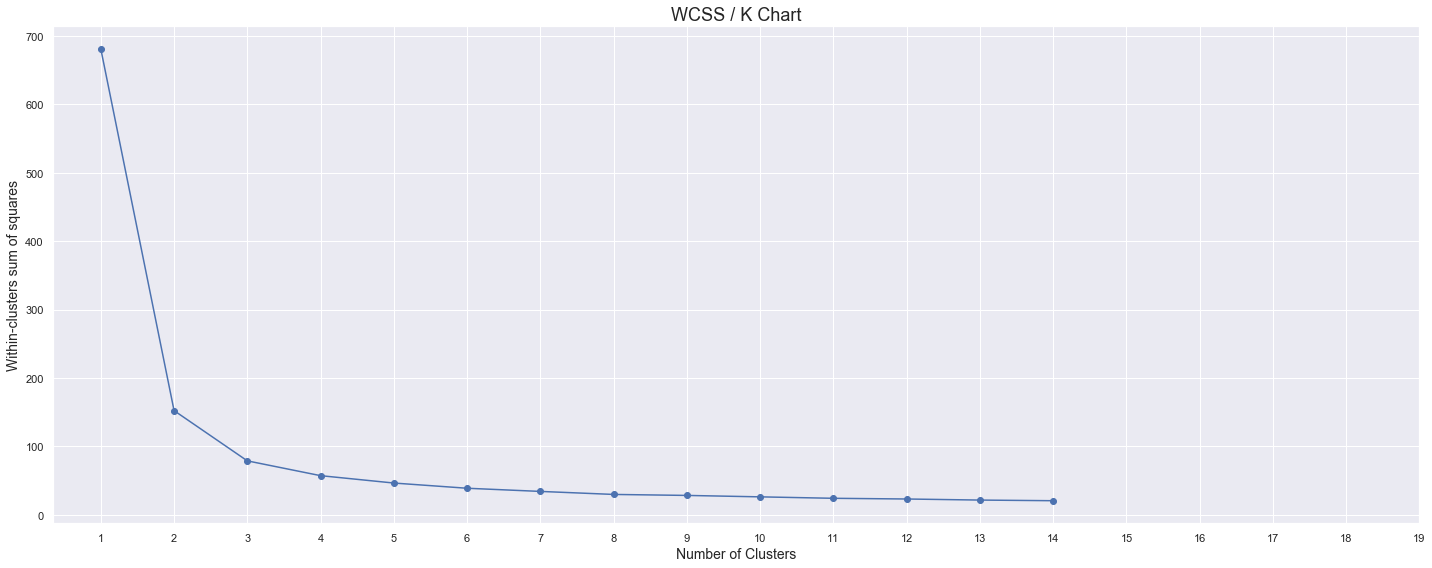

In [15]:
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters",fontsize=14)
plt.ylabel("Within-clusters sum of squares",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

 k = 3 or 2 seems to be the optimal value
 
 **Let's Check!**

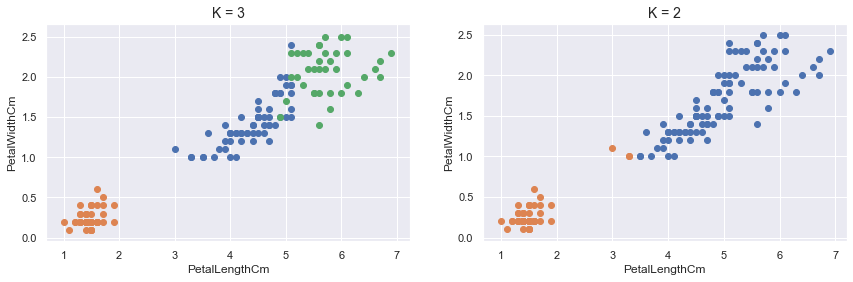

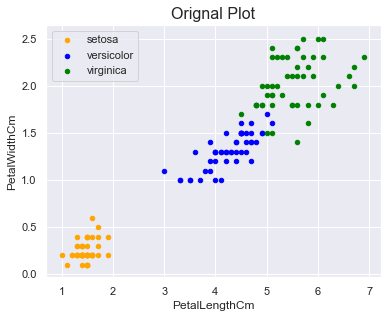

In [16]:
# Scatterplot for PetalLengthCm v/s PetalWidthCm
plt.figure(figsize=(30,4))

plt.subplot(1,4,2)
plt.title("K = 2",fontsize=14)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])


plt.subplot(1,4,1)
plt.title("K = 3",fontsize=14)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])


ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='orange', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='virginica', ax=ax)
ax.set_title("Orignal Plot",fontsize=16)

plt.subplots_adjust(top=1.0)
plt.show()

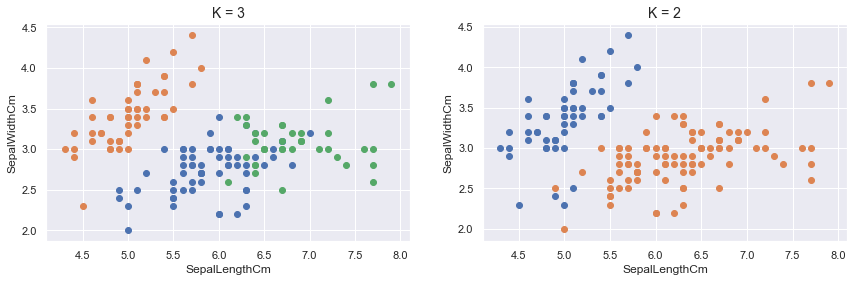

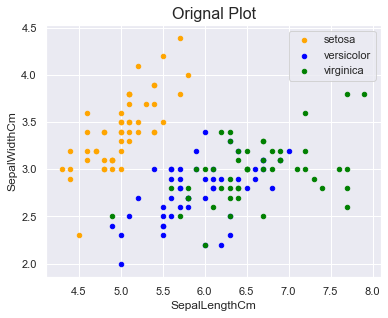

In [17]:
# Scatterplot for SepalLengthCm v/s SepalWidthCm
plt.figure(figsize=(30,4))

plt.subplot(1,4,2)
plt.title("K = 2",fontsize=14)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])


plt.subplot(1,4,1)
plt.title("K = 3",fontsize=14)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='orange', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='virginica', ax=ax)
ax.set_title("Orignal Plot",fontsize=16)

plt.subplots_adjust(top=1.0)
plt.show()

From the above plot it is clear that the value of **k=3** is optimal as it resembles the orignal plot very much.

## Visualizing the clusters

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

x = data.iloc[:, [0, 1, 2, 3]].values

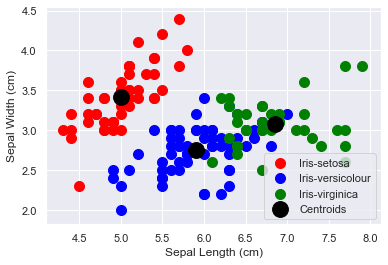

In [19]:
# Visualising the clusters (SepalLengthCm vs SepalWidthCm)
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 250, c = 'black', label = 'Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

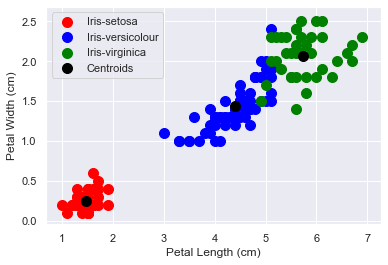

In [20]:
# Visualising the clusters (PetalLengthCm vs PetalWidthCm)
plt.scatter(x[y_kmeans == 0,2], x[y_kmeans == 0,3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,2], x[y_kmeans == 1,3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,2], x[y_kmeans == 2,3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'black', label = 'Centroids')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

We see that clustering **"iris-setosa"** was easy because it's data points are all easily differentiable. Whereas there are some misclassifications while differentiating between "iris-versicolour" and "iris-virginia".